# Text Analytics with Python

Text analytics, also known as Natural Language Processing (NLP), refer to the analytics toward text-based data.

Text-based communication has become one of the most common forms of expression. We email, text message, tweet, and update our statuses on a daily basis. As a result, unstructured text data has become extremely common, and analyzing large quantities of text data is now a key way to understand what people are thinking.

One of the biggest breakthroughs required for achieving any level of artificial intelligence is to have machines which can process text data. Thankfully, the amount of text data being generated in this universe has exploded exponentially in the last few years.

It has become imperative for an organization to have a structure in place to mine actionable insights from the text being generated. From social media analytics to risk management and cybercrime protection, dealing with text data has never been more important.

In this article we will discuss different feature extraction methods, starting with some basic techniques which will lead into advanced Natural Language Processing techniques. We will also learn about pre-processing of the text data in order to extract better features from clean data.

By the end of this article, you will be able to perform text operations by yourself. Let’s get started!

Original tutorial from [link](https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/), revised and adapted by Dr. Tao.
ver 1.0, May 2018

# Table of Contents

1. Basic feature extraction using text data
    - Load data
    - Number of words
    - Unique Words and Their Counts
    - Other Counts of Words
2. Basic Text Pre-processing of text data
    - Lower case
    - Removing Punctuation
    - Removal of Stop Words
    - Common words removal
    - Rare words removal
    - Spelling correction
    - Tokenization
    - Stemming
    - Lemmatization
    - Part-of-Speach Tagging

# 1. Basic Text Feature Extraction

We can use text data to extract a number of features even if we don’t have sufficient knowledge of Natural Language Processing. So let’s discuss some of them in this section.

Before starting, let’s quickly read the training file from the dataset in order to perform different tasks on it. In the entire article, we will use the *twitter sentiment dataset* provided with NLTK.

In this class we are playing with Twitter data, NLTK has the data embedded - we can just load them from there.

## 1.0 Load Data

In [1]:
from nltk.corpus import twitter_samples

The data is loaded as a JSON file - which can be intuitively loaded as a dict. Let's look at what are included.

In [2]:
twitter_samples.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

It is clear the data is divided into three parts:
    - positive;
    - negative (these two are used for training in sentiment analysis);
    - tweets.20150430... 
    
In this particular exercise, we want to focus on the **positive** tweets.

In [3]:
pos_tweets = twitter_samples.strings('positive_tweets.json')

Let's look at what is in our *pos_tweets* data.

In [4]:
type(pos_tweets)

list

### YOUR TURN HERE
Provide your code in the block below two list the first **10** tweets in the *pos_tweets* dataset.

In [5]:
#### YOUR CODE HERE
pos_tweets[:9]

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
 '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!',
 '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!',
 '@97sides CONGRATS :)',
 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days',
 '@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM',
 "We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI",
 '@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.',
 'Jgh , but we have to go to Bayan :D bye']

## 1.1 Number of Words

The first fact we want to know about text are word counts - let us start counting each tweet.

In [6]:
# This will return the count for the first tweet
print('The first tweet has %s words.' % str(len(pos_tweets[0].split(' '))))

The first tweet has 15 words.


### YOUR TURN HERE

Provide the word counts for the first **10** tweets.

In [7]:
#### YOUR CODE HERE
for i,s in enumerate(pos_tweets[:9]):
    print('Tweet No.%s has %s words.' % (str(i+1), str(len(s.split(' ')))))

Tweet No.1 has 15 words.
Tweet No.2 has 24 words.
Tweet No.3 has 20 words.
Tweet No.4 has 3 words.
Tweet No.5 has 22 words.
Tweet No.6 has 8 words.
Tweet No.7 has 21 words.
Tweet No.8 has 22 words.
Tweet No.9 has 11 words.


Clearly this is not very data science like approach, so we are going to use a powerful tool provided in Python: **Pandas**.

In [8]:
import pandas as pd

In [9]:
pos_tweets = pd.DataFrame(pos_tweets, columns=['text'])
pos_tweets.head()

,text
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...
1,@Lamb2ja Hey James! How odd :/ Please call our...
2,@DespiteOfficial we had a listen last night :)...
3,@97sides CONGRATS :)
4,yeaaaah yippppy!!! my accnt verified rqst has...


Now we can count words in every tweet.

In [10]:
pos_tweets['word_count'] = pos_tweets['text'].apply(lambda x: len(str(x).split(" ")))
pos_tweets.head()

,text,word_count
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,15
1,@Lamb2ja Hey James! How odd :/ Please call our...,24
2,@DespiteOfficial we had a listen last night :)...,20
3,@97sides CONGRATS :),3
4,yeaaaah yippppy!!! my accnt verified rqst has...,22


We can also look at the number of characters in each tweet.

In [11]:
pos_tweets['char_count'] = pos_tweets.text.str.len()
pos_tweets.head()

,text,word_count,char_count
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,15,111
1,@Lamb2ja Hey James! How odd :/ Please call our...,24,126
2,@DespiteOfficial we had a listen last night :)...,20,107
3,@97sides CONGRATS :),3,20
4,yeaaaah yippppy!!! my accnt verified rqst has...,22,106


We will also extract another feature which will calculate the average word length of each tweet. This can also potentially help us in improving our model.

Here, we simply take the sum of the length of all the words and divide it by the total length of the tweet:

In [12]:
# We use this function to calcualte the average word length in each tweet
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

pos_tweets['avg_word_length'] = pos_tweets.text.apply(lambda x: avg_word(x))
pos_tweets.head()

,text,word_count,char_count,avg_word_length
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,15,111,6.466667
1,@Lamb2ja Hey James! How odd :/ Please call our...,24,126,4.291667
2,@DespiteOfficial we had a listen last night :)...,20,107,4.400000
3,@97sides CONGRATS :),3,20,6.000000
4,yeaaaah yippppy!!! my accnt verified rqst has...,22,106,4.047619


Let's save this dataframe just in case.

In [13]:
pos_tweets.to_csv('pos_tweets.csv')

## 1.2 Unique Words and Their Counts

You may have observed that the split() function is not well at identifying words - so we are going to use a built-in method with NLTK to identify words - namely tokenization. 

Refer to this [link](https://www.nltk.org/book/ch03.html) for more information.

You should have noticed from the results below that we can capture the emojis from tweets using the TweetTokenizer.

In [14]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer() # This function is particularly used for tweets
from collections import Counter
vocab = Counter()

Now we can process the count of unique words in the overall set of texts - namely **Corpus**.

In [15]:
for text in pos_tweets.text:
    n = tknzr.tokenize(text)
    vocab.update(n)

vocab

Counter({':)': 3691, '!': 1844, '.': 1341, 'you': 1341, 'to': 1065, 'the': 999, ',': 964, 'I': 890, 'a': 888, 'for': 749, ':-)': 701, 'and': 660, ':D': 658, '?': 581, ')': 525, 'my': 484, 'in': 481, 'it': 460, 'is': 418, 'of': 403, 'have': 342, 'me': 330, 'your': 320, 'on': 313, '...': 290, 'follow': 284, '"': 264, 'this': 263, 'be': 249, ':': 249, 'that': 246, 'so': 234, 'u': 228, 'with': 221, '-': 213, 'Thanks': 209, 'like': 209, 'i': 203, 'day': 202, 'all': 197, 'love': 184, 'are': 184, 'thanks': 182, '&': 174, 'will': 168, 'at': 167, 'good': 162, "I'm": 161, 'back': 154, 'just': 152, 'we': 146, 'Hi': 141, 'know': 141, 'but': 141, 'get': 139, 'can': 139, 'great': 138, 'up': 138, ':p': 138, '<3': 135, 'was': 133, 'Thank': 131, 'do': 131, 'if': 130, 'our': 130, '..': 129, 'too': 127, 'new': 126, 'not': 123, 'one': 113, 'now': 113, 'thank': 113, 'about': 112, 'an': 110, 'out': 110, 'us': 109, 'see': 109, 'time': 105, "it's": 105, 'Happy': 104, 'today': 104, 'from': 103, "'": 100, 'more

How many unique token (words) in the corpus?

In [16]:
print('The corpus has %s unique words.' % str(len(vocab)))

The corpus has 15302 unique words.


What are the top 10 unique words in the corpus, by their counts?

In [17]:
print(vocab.most_common(10))

[(':)', 3691), ('!', 1844), ('.', 1341), ('you', 1341), ('to', 1065), ('the', 999), (',', 964), ('I', 890), ('a', 888), ('for', 749)]


In [18]:
dict(vocab.most_common(10))

{'!': 1844,
 ',': 964,
 '.': 1341,
 ':)': 3691,
 'I': 890,
 'a': 888,
 'for': 749,
 'the': 999,
 'to': 1065,
 'you': 1341}

Does above list make any sense to you? Maybe not.

Nonetheless, we should visualize the counter of unique words just because we can.

We should just visualze the most 20 words because of the long running time.

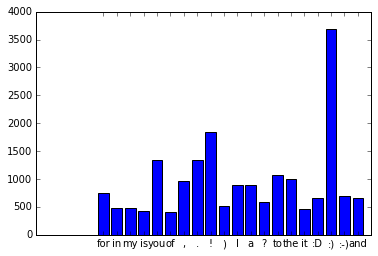

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

count_dict = dict(vocab.most_common(20))
words = range(len(count_dict))
plt.bar(words, count_dict.values(), color='blue', align='center', tick_label=count_dict.keys())
plt.show()

## 1.3 Other Counts of Words

Sometimes we also care about other counts of words in a corpus, let's go through them.

For instance, we noticed that the most common words from the counter (vocab) have less meanings - we call them **stopwords** (i.e. 'I', 'the', ...). Let's examine them by counts for now.

In [20]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

pos_tweets['stop_counts'] = pos_tweets.text.apply(lambda x: len([x for x in x.split() if x in stop]))
pos_tweets.head()

,text,word_count,char_count,avg_word_length,stop_counts
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,15,111,6.466667,5
1,@Lamb2ja Hey James! How odd :/ Please call our...,24,126,4.291667,8
2,@DespiteOfficial we had a listen last night :)...,20,107,4.400000,8
3,@97sides CONGRATS :),3,20,6.000000,0
4,yeaaaah yippppy!!! my accnt verified rqst has...,22,106,4.047619,6


We also noticed that a great amount of special characters, such as *emojis*, appeared in the tweets. We can count them as well.

In [21]:
t = pos_tweets.text[0]
print(tknzr.tokenize(t))

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']


In [22]:
import re
def count_special_char(sentence):
    non_special = [tok for tok in tknzr.tokenize(sentence) if(re.search(r'^\w', tok))]
    return(len(non_special))

In [23]:
count_special_char(t)

10

In [24]:
pos_tweets['special_char'] = pos_tweets.text.apply(lambda x: len(tknzr.tokenize(x)) - count_special_char(x))
pos_tweets.head()

,text,word_count,char_count,avg_word_length,stop_counts,special_char
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,15,111,6.466667,5,5
1,@Lamb2ja Hey James! How odd :/ Please call our...,24,126,4.291667,8,5
2,@DespiteOfficial we had a listen last night :)...,20,107,4.400000,8,5
3,@97sides CONGRATS :),3,20,6.000000,0,2
4,yeaaaah yippppy!!! my accnt verified rqst has...,22,106,4.047619,6,4


We may also care about the number of numerics in each tweet.

Just like we calculated the number of words, we can also calculate the number of numerics which are present in the tweets. It does not have a lot of use in our example, but this is still a useful feature that should be run while doing similar exercises. For example, 

In [25]:
pos_tweets['num_counts'] = pos_tweets.text.apply(lambda x: len([x for x in x.split() if x.isdigit()]))
pos_tweets[['text','num_counts']].head()

,text,num_counts
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,0
1,@Lamb2ja Hey James! How odd :/ Please call our...,1
2,@DespiteOfficial we had a listen last night :)...,0
3,@97sides CONGRATS :),0
4,yeaaaah yippppy!!! my accnt verified rqst has...,1


### YOUR TURN HERE

Say we are interested in searching for all long words in the tweets. A long word is defined as:
- has more than 5 letters;
- has to be a word (not special character, numerics, ...)

Please write you own code for the **count of long words** and add it as a column in *pos_tweets*.

**HINT**: use code/results from above as much as you can.

In [26]:
## YOUR CODE HERE
def long_words(sentence):
    non_special = [tok for tok in tknzr.tokenize(sentence) if(re.search(r'^\w', tok))]
    non_numeric = [tok for tok in non_special if not tok.isdigit()]
    lng_wrds = [w for w in non_numeric if len(w) > 5]
    return(len(lng_wrds))

In [27]:
long_words(t)

3

In [28]:
pos_tweets['lng_wrd_counts'] = pos_tweets.text.apply(lambda x: long_words(x))
pos_tweets[['text','lng_wrd_counts']].head()

,text,lng_wrd_counts
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,3
1,@Lamb2ja Hey James! How odd :/ Please call our...,5
2,@DespiteOfficial we had a listen last night :)...,3
3,@97sides CONGRATS :),1
4,yeaaaah yippppy!!! my accnt verified rqst has...,5


# 2. Basic Preprocessing

So far, we have learned how to extract basic features from text data. Before diving into text and feature extraction, our first step should be cleaning the data in order to obtain better features. We will achieve this by doing some of the basic pre-processing steps on our training data.

So, let’s get into it.

## 2.1 Lower case

The first pre-processing step which we will do is transform our tweets into lower case. This avoids having multiple copies of the same words. For example, while calculating the word count, ‘Analytics’ and ‘analytics’ will be taken as different words.

In [29]:
pos_tweets['lower'] = pos_tweets.text.apply(lambda x: " ".join(x.lower() for x in x.split()))
pos_tweets.lower.head()

0    #followfriday @france_inte @pkuchly57 @milipol...
1    @lamb2ja hey james! how odd :/ please call our...
2    @despiteofficial we had a listen last night :)...
3                                 @97sides congrats :)
4    yeaaaah yippppy!!! my accnt verified rqst has ...
Name: lower, dtype: object

## 2.2 Removing Punctuation

The next step is to remove punctuation, as it doesn’t add any extra information while treating text data. Therefore removing all instances of it will help us reduce the size of the training data.

In [30]:
from nltk.tokenize import RegexpTokenizer
reg_tok = RegexpTokenizer(r'\w+')
pos_tweets['no_punc'] = pos_tweets['lower'].apply(lambda x: ' '.join(reg_tok.tokenize(x)))
pos_tweets.no_punc.head()

0    followfriday france_inte pkuchly57 milipol_par...
1    lamb2ja hey james how odd please call our cont...
2    despiteofficial we had a listen last night as ...
3                                     97sides congrats
4    yeaaaah yippppy my accnt verified rqst has suc...
Name: no_punc, dtype: object

As you can see in the above output, all the punctuation, including ‘#’ and ‘@’, has been removed from the training data.

## 2.3 Removal of Stop Words

As we discussed earlier, stop words (or commonly occurring words) should be removed from the text data. For this purpose, we can either create a list of stopwords ourselves or we can use predefined libraries.

In [31]:
pos_tweets['no_stop'] = pos_tweets['no_punc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
pos_tweets.no_stop.head()

0    followfriday france_inte pkuchly57 milipol_par...
1    lamb2ja hey james odd please call contact cent...
2    despiteofficial listen last night bleed amazin...
3                                     97sides congrats
4    yeaaaah yippppy accnt verified rqst succeed go...
Name: no_stop, dtype: object

## 2.4 Common word removal

Previously, we just removed commonly occurring words in a general sense. We can also remove commonly occurring words from our text data First, let’s check the 10 most frequently occurring words in our text data then take call to remove or retain.

In [32]:
freq = pd.Series(' '.join(pos_tweets['no_stop']).split()).value_counts()[:10]
freq

co        1195
http       856
thanks     393
https      336
follow     308
love       275
u          248
thank      248
good       235
like       219
dtype: int64

Now, let’s remove these words as their presence will not of any use in classification of our text data.

In [33]:
freq = list(freq.index)
pos_tweets['no_common'] = pos_tweets['no_stop'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
pos_tweets['no_common'].head()

0    followfriday france_inte pkuchly57 milipol_par...
1    lamb2ja hey james odd please call contact cent...
2    despiteofficial listen last night bleed amazin...
3                                     97sides congrats
4    yeaaaah yippppy accnt verified rqst succeed go...
Name: no_common, dtype: object

## 2.5 Rare words removal

Similarly, just as we removed the most common words, this time let’s remove rarely occurring words from the text. Because they’re so rare, the association between them and other words is dominated by noise. You can replace rare words with a more general form and then this will have higher counts.

In [35]:
rare = pd.Series(' '.join(pos_tweets['no_common']).split()).value_counts()[-10:]
rare

deepthroat                1
liow4bizi7                1
1710                      1
keepin                    1
ukopenmic                 1
thebitblock               1
sia                       1
sadomasochistsparadise    1
jonny_ives                1
hikershell                1
dtype: int64

In [36]:
rare = list(rare.index)
pos_tweets['no_rare'] = pos_tweets['no_common'].apply(lambda x: " ".join(x for x in x.split() if x not in rare))
pos_tweets['no_common'].head()

0    followfriday france_inte pkuchly57 milipol_par...
1    lamb2ja hey james odd please call contact cent...
2    despiteofficial listen last night bleed amazin...
3                                     97sides congrats
4    yeaaaah yippppy accnt verified rqst succeed go...
Name: no_common, dtype: object

##2.6 Spelling correction

We’ve all seen tweets with a plethora of spelling mistakes. Our timelines are often filled with hastly sent tweets that are barely legible at times.

In that regard, spelling correction is a useful pre-processing step because this also will help us in reducing multiple copies of words. For example, “Analytics” and “analytcs” will be treated as different words even if they are used in the same sense.

To achieve this we will use the textblob library. If you are not familiar with it, you can check my previous article on ‘NLP for beginners using textblob’.

In [37]:
from textblob import TextBlob
pos_tweets['no_common'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    followfriday france_inte pkuchly57 milipol_par...
1    lamb2ja hey james odd please call contact cent...
2    despiteofficial listen last night bleed amazin...
3                                       sides congress
4    yeaaaah yippppy accent verified rest succeed g...
Name: no_common, dtype: object

Note that some of the words are corrected accurately ('accnt -> accent'); also some are not ('rqst' -> 'rest').

## 2.7 Tokenization - Again

Tokenization refers to dividing the text into a sequence of words or sentences. In our example, we have used the textblob library to first transform our tweets into a blob and then converted them into a series of words.

In [38]:
from nltk.tokenize import TweetTokenizer
twtkr = TweetTokenizer()
twtkr.tokenize(pos_tweets['text'][1])

['@Lamb2ja',
 'Hey',
 'James',
 '!',
 'How',
 'odd',
 ':/',
 'Please',
 'call',
 'our',
 'Contact',
 'Centre',
 'on',
 '02392441234',
 'and',
 'we',
 'will',
 'be',
 'able',
 'to',
 'assist',
 'you',
 ':)',
 'Many',
 'thanks',
 '!']

### YOUR TURN HERE

Select the last 10 tweets in the dataset (pos_tweets), then use following tokenizers to tokenize each tweet and output the results.
- Regxp Tokenizer (reg_tok)
- Tweet Tokenizer (twtkr)

In [44]:
# We already defined both tokenizer, now we just need to call them
pos_tweets['text'][-10:].apply(lambda x: reg_tok.tokenize(x))

4990    [Niallll_1Dx, it, s, a, cool, video, i, love, ...
4991    [Season, 11, set, Have, a, nice, Friday, SPNFa...
4992                    [theguyliner, Trishie_D, cool, D]
4993                                 [fczbkk, Exactly, D]
4994    [kevinngmingyuan, peasant, seats, to, watch, a...
4995    [chriswiggin3, Chris, that, s, great, to, hear...
4996    [RachelLiskeard, Thanks, for, the, shout, out,...
4997                 [side556, Hey, Long, time, no, talk]
4998    [staybubbly69, as, Matt, would, say, WELCOME, ...
4999    [DanielOConnel18, you, could, say, he, will, h...
Name: text, dtype: object

In [43]:
pos_tweets['text'][-10:].apply(lambda x: twtkr.tokenize(x))

4990    [@Niallll_1Dx, it's, a, cool, video, i, love, ...
4991    [Season, 11, set, ♡, Have, a, nice, Friday, #S...
4992              [@theguyliner, @Trishie_D, cool, ., :D]
4993                            [@fczbkk, Exactly, !, :D]
4994    [@kevinngmingyuan, peasant, seats, to, watch, ...
4995    [@chriswiggin3, Chris, ,, that's, great, to, h...
4996    [@RachelLiskeard, Thanks, for, the, shout-out,...
4997    [@side556, Hey, !, :), Long, time, no, talk, ...]
4998    [@staybubbly69, as, Matt, would, say, ., WELCO...
4999    [@DanielOConnel18, you, could, say, he, will, ...
Name: text, dtype: object

## 2.8 Stemming

Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. For this purpose, we will use PorterStemmer from the NLTK library.

In [47]:
from nltk.stem.snowball import SnowballStemmer
st = SnowballStemmer("english")
pos_tweets['text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    #followfriday @france_int @pkuchly57 @milipol_...
1    @lamb2ja hey james! how odd :/ pleas call our ...
2    @despiteoffici we had a listen last night :) a...
3                                   @97side congrat :)
4    yeaaaah yippppy!!! my accnt verifi rqst has su...
Name: text, dtype: object

Twitter data is not very good from stemming because of the spelling and non plain English tokens (handles, tags, ...). However, to further prove that the stemming is working, try code below.

In [49]:
print(st.stem('running'))

run


Note that we are using the native Snowball stemmer; we can also use other stemmer within it.

In [53]:
print('Use Snowball stemmer on generously is: %s.' % str(SnowballStemmer("english").stem("generously")))
print('Use Porter stemmer on generously is: %s.' % str(SnowballStemmer("porter").stem("generously")))

Use Snowball stemmer on generously is: generous.
Use Porter stemmer on generously is: gener.


## 2.9 Lemmatization

Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. **Therefore, we usually prefer using lemmatization over stemming.**

In [54]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
pos_tweets['text'][:5].apply(lambda x: " ".join([wordnet_lemmatizer.lemmatize(word) for word in x.split()]))

0    #FollowFriday @France_Inte @PKuchly57 @Milipol...
1    @Lamb2ja Hey James! How odd :/ Please call our...
2    @DespiteOfficial we had a listen last night :)...
3                                 @97sides CONGRATS :)
4    yeaaaah yippppy!!! my accnt verified rqst ha s...
Name: text, dtype: object

Again, tweets may not be the best for demonstrating *lemmatization*, so we check following examples.

In [55]:
my_sent = 'WordNet superficially resembles a thesaurus, in that it groups words together based on their meanings. \
However, there are some important distinctions.'
[wordnet_lemmatizer.lemmatize(w) for w in reg_tok.tokenize(my_sent)]

['WordNet',
 'superficially',
 'resembles',
 'a',
 'thesaurus',
 'in',
 'that',
 'it',
 'group',
 'word',
 'together',
 'based',
 'on',
 'their',
 'meaning',
 'However',
 'there',
 'are',
 'some',
 'important',
 'distinction']

You can also define the Part-of-Speech in lemmatization. See code below.

In [58]:
wordnet_lemmatizer.lemmatize('are', pos='v')

'be'

##2.10 Part-of-Speech Tagging

Part-of-speech tagging is one of the most important text analysis tasks used to classify words into their part-of-speech and label them according the tagset which is a collection of tags used for the pos tagging. Part-of-speech tagging also known as word classes or lexical categories. Detailed definition can be found on [Wikipedia](https://en.wikipedia.org/wiki/Part-of-speech_tagging).

In [66]:
s = 'Due to the nature of this tagger, it works best when trained over sentence delimited input.'
from nltk import pos_tag
pos_tag([w for w in reg_tok.tokenize(s)])

[('Due', 'JJ'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('nature', 'NN'),
 ('of', 'IN'),
 ('this', 'DT'),
 ('tagger', 'NN'),
 ('it', 'PRP'),
 ('works', 'VBZ'),
 ('best', 'RB'),
 ('when', 'WRB'),
 ('trained', 'VBN'),
 ('over', 'IN'),
 ('sentence', 'NN'),
 ('delimited', 'VBN'),
 ('input', 'NN')]

Note that pos_tag by default takes **a list of strings** as input; if you input a string, pos_tag will split it for you.

### End of Tutorial

In this tutorial, we complete **basic feature extraction** and **basic text pre-processing** in this tutorial. We will continue with **advanced text processing** in Part 2 of the tutorial.